# Displaying SEN2 data from a Demo PNG

In [1]:
# Test should run from root
import os
from pathlib import Path

from omegaconf import OmegaConf
import rasterio
from rasterio.plot import show
from metaearth.api import extract_assets
from metaearth.config import ConfigSchema

os.chdir("..")

In [10]:
cfg = OmegaConf.load("config/sen2.yaml")
cfg_schema = OmegaConf.structured(ConfigSchema)
cfg = OmegaConf.merge(cfg_schema, cfg)


# Constrain the test to only pull one item and one band
for pvdr in cfg.providers:
    for coll in pvdr.collections:
        coll.max_items = 1
        coll.assets = ["preview"]

success = extract_assets(cfg)

print("Successfully extracted assets." if success else "Asset extraction failed.")

16:49:22 INFO - Extraction details for provider ProviderKey.MPC with collection sentinel-2-l2a: 
id: sentinel-2-l2a
assets:
- preview
outdir: null
datetime: null
aoi_file: null
max_items: 1

16:49:23 INFO - Microsoft Planetary Computer (MPC) returned 1 items for sentinel-2-l2a for datetime 2022-01-01/2022-01-02
16:49:23 INFO - 1 assets did not specify file size, will query size directly with http request (this may take a few moments)
system.query_asset_sizes=False can be used to disable this behavior
100%|██████████| 1/1 [00:00<00:00,  1.46it/s]
16:49:23 INFO - 1 assets have unknown file size
16:49:23 INFO - 

****************************************************************************************************
To Extract:
Microsoft Planetary Computer (MPC): sentinel-2-l2a


Collection               | Key                 | Description
--------------------------------------------------------------------------------
sentinel-2-l2a           | preview             | Thumbnail


Collection si

Successfully extracted assets.


In [8]:
# Find the first GeoTIFF file and load it
# We avoid hardcoding the path here in case the API changes down the road

fpath = Path(cfg["default_collection"]["outdir"])
collection_for_gt = "sentinel-2-l2a"
gt_files = list((fpath / collection_for_gt).glob("**/*.tif"))

assert (
    len(gt_files) <= 1
), "There were too many files pulled, `max_items` failed to constrain."

gt_file_fpath = gt_files[0]

data = rasterio.open(gt_file_fpath)

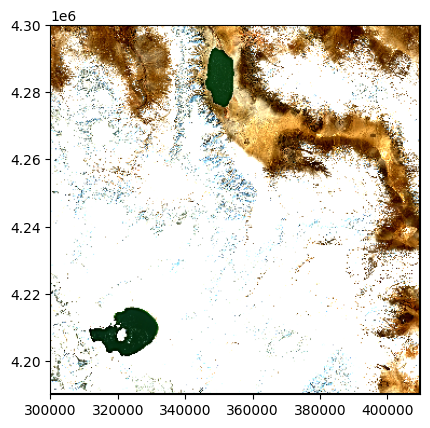

<AxesSubplot:>

In [9]:
show(data)